In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [6]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
tf.test.is_built_with_cuda()

True

In [8]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 63s 0us/step


In [9]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [12]:
y_train.shape

(50000, 1)

In [13]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

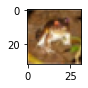

In [18]:
plot_sample(0)

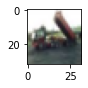

In [19]:
plot_sample(2)

In [20]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


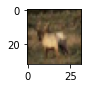

In [21]:
plot_sample(3)

In [22]:
y_train[3]

array([4], dtype=uint8)

In [23]:
classes[y_train[3][0]]

'deer'

In [24]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [25]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [26]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)


In [27]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
# 50k images each image of size 32*32*3 so flatten the image-->convert matrix to vector
X_train.shape

(50000, 32, 32, 3)

In [30]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 107s 66ms/step - loss: 1.8123 - accuracy: 0.3539
Epoch 2/50
1563/1563 [==============================] - 101s 65ms/step - loss: 1.6234 - accuracy: 0.4297
Epoch 3/50
1563/1563 [==============================] - 102s 65ms/step - loss: 1.5432 - accuracy: 0.4557
Epoch 4/50
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4815 - accuracy: 0.4774
Epoch 5/50
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4299 - accuracy: 0.4963
Epoch 6/50
1563/1563 [==============================] - 99s 63ms/step - loss: 1.3900 - accuracy: 0.5100
Epoch 7/50
1563/1563 [==============================] - 112s 71ms/step - loss: 1.3510 - accuracy: 0.5241
Epoch 8/50
1563/1563 [==============================] - 128s 82ms/step - loss: 1.3156 - accuracy: 0.5367
Epoch 9/50
1563/1563 [==============================] - 106s 67ms/step - loss: 1.2824 - accuracy: 0.5514
Epoch 10/50
1563/1563 [==============================] -

In [31]:
np.argmax(model.predict(X_test_scaled)[0])

3

In [32]:
y_test[0]

array([3], dtype=uint8)

In [33]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [34]:
# Measure training time on a CPU
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)


UsageError: Line magic function `%%timeit` not found.


In [35]:
#Lets measure training time on a GPU
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)


UsageError: Line magic function `%%timeit` not found.


In [36]:
#Lets run same test for 10 epocs
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

UsageError: Line magic function `%%timeit` not found.


In [37]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 96s 60ms/step - loss: 1.8172 - accuracy: 0.3544
Epoch 2/10
1563/1563 [==============================] - 91s 58ms/step - loss: 1.6276 - accuracy: 0.4252
Epoch 3/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.5461 - accuracy: 0.4556
Epoch 4/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4855 - accuracy: 0.4763
Epoch 5/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.4354 - accuracy: 0.4959
Epoch 6/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.3916 - accuracy: 0.5086
Epoch 7/10
1563/1563 [==============================] - 93s 60ms/step - loss: 1.3519 - accuracy: 0.5241
Epoch 8/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.3213 - accuracy: 0.5363
Epoch 9/10
1563/1563 [==============================] - 98s 62ms/step - loss: 1.2863 - accuracy: 0.5489
Epoch 10/10
1563/1563 [==============================] - 104s 67